In [18]:
# Importing the Libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


import scipy.io.wavfile as wavfile
import scipy.fftpack as fftpk
from matplotlib import pyplot as plt

import sounddevice as sd
import soundfile as sf
import librosa

from IPython.display import Image
import ipywidgets as widgets
from IPython.display import display

In [19]:
data = pd.read_csv("training.csv")
data.head()

,RMS,Mean,MA1,MA2,MA3,F1,F2,F3,FailureID
0,0.972163,0.703692,11345.330649,10650.442003,9478.125858,0.8,11.2,14.8,1.0
1,0.983376,0.712754,13912.673376,13072.899063,12577.832679,4.4,13.6,2.8,1.0
2,0.970084,0.700829,15308.184891,10697.594058,10114.993216,3.6,2.4,1.2,1.0
3,0.969463,0.701825,12868.452031,12035.586142,9549.310121,5.2,1.6,11.2,1.0
4,0.983319,0.713275,15044.457164,14697.736198,12384.556364,4.0,3.2,3.6,1.0


In [20]:
data.shape

(400, 9)

In [21]:
data.columns

Index(['RMS', 'Mean', 'MA1', 'MA2', 'MA3', 'F1', 'F2', 'F3', 'FailureID'], dtype='object')

In [22]:
data.isnull().sum()

RMS          0
Mean         0
MA1          0
MA2          0
MA3          0
F1           0
F2           0
F3           0
FailureID    0
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RMS        400 non-null    float64
 1   Mean       400 non-null    float64
 2   MA1        400 non-null    float64
 3   MA2        400 non-null    float64
 4   MA3        400 non-null    float64
 5   F1         400 non-null    float64
 6   F2         400 non-null    float64
 7   F3         400 non-null    float64
 8   FailureID  400 non-null    float64
dtypes: float64(9)
memory usage: 28.2 KB


In [24]:
print(data.describe())

              RMS         Mean           MA1           MA2           MA3  \
count  400.000000   400.000000  4.000000e+02  4.000000e+02  4.000000e+02   
mean    12.122919  1672.698727  1.050273e+08  8.415933e+07  7.209656e+07   
std      8.369926  1274.774543  1.299438e+08  1.012701e+08  8.656564e+07   
min      0.960709     0.693492  8.751333e+03  8.339308e+03  7.511951e+03   
25%      1.245567   917.048081  1.027357e+07  9.673593e+06  8.957489e+06   
50%     13.719582  1567.400660  4.231612e+07  3.853333e+07  3.220835e+07   
75%     20.176896  2342.896586  1.413546e+08  1.096933e+08  9.409730e+07   
max     24.122029  3652.015275  4.506361e+08  3.420165e+08  3.058491e+08   

                F1           F2           F3   FailureID  
count   400.000000   400.000000   400.000000  400.000000  
mean   1462.288000  1275.203000  1185.583000    2.500000  
std    1944.825922  1637.919607  1555.905961    1.119434  
min       0.800000     0.800000     0.800000    1.000000  
25%     547.400000  

In [25]:
print(data.corr())

                RMS      Mean       MA1       MA2       MA3        F1  \
RMS        1.000000  0.186615 -0.152255 -0.151852 -0.148251  0.683072   
Mean       0.186615  1.000000  0.905916  0.920529  0.922626 -0.011355   
MA1       -0.152255  0.905916  1.000000  0.963598  0.954599 -0.220486   
MA2       -0.151852  0.920529  0.963598  1.000000  0.985299 -0.216437   
MA3       -0.148251  0.922626  0.954599  0.985299  1.000000 -0.209809   
F1         0.683072 -0.011355 -0.220486 -0.216437 -0.209809  1.000000   
F2         0.675018  0.022017 -0.182568 -0.178986 -0.172290  0.641943   
F3         0.634188  0.041666 -0.157283 -0.152284 -0.147223  0.639391   
FailureID  0.352874  0.879383  0.760275  0.771243  0.779382  0.335947   

                 F2        F3  FailureID  
RMS        0.675018  0.634188   0.352874  
Mean       0.022017  0.041666   0.879383  
MA1       -0.182568 -0.157283   0.760275  
MA2       -0.178986 -0.152284   0.771243  
MA3       -0.172290 -0.147223   0.779382  
F1         

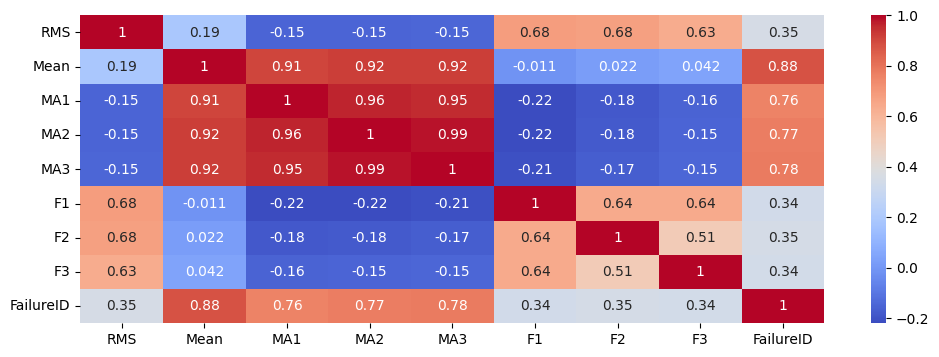

In [26]:
plt.figure(figsize=(12,4))
correlations = data.corr()
sns.heatmap(correlations, cmap="coolwarm",annot=True)
plt.show()

In [27]:
predict="FailureID"
data = data[["RMS","Mean","MA1","MA2","MA3","F1","F2","F3","FailureID"]]

In [28]:
x = np.array(data.drop([predict], axis=1))
y = np.array(data[predict])

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [29]:
rf = RandomForestClassifier(min_samples_split=10,random_state=1)
model = rf.fit(x_train,y_train)
model

RandomForestClassifier(min_samples_split=10, random_state=1)

In [30]:
prediction = rf.predict(x_test)
print("Mean Absolute Error:", mean_absolute_error(y_test,prediction))
# print("Mean Absolute Precentage Error:",mean_absolute_precentage_error(y_test,prediction))
# print("Mean Squared Error:", mean_squared_error(y_test,prediction))
# print("Root Mean Squared Error:", np.sqrt( mean_squared_error(y_test,prediction)))
# print("R2 Score:", r2_score(y_test,prediction))


Mean Absolute Error: 0.0


In [44]:
print(x_test.shape)
predictions = model.predict([x_test[70]])
predictions

(80, 8)


array([4.])

In [33]:
import pickle
pickle.dump(model,open("machine_failure_detection_model3.pkl","wb"))

In [46]:
import json
features = [1,2,3,4,5,6,7,8]
input_data = pd.DataFrame([features])
input_data.columns = ["RMS","Mean","MA1","MA2","MA3","F1","F2","F3"]
input_data

,RMS,Mean,MA1,MA2,MA3,F1,F2,F3
0,1,2,3,4,5,6,7,8


In [67]:
arr = input_data.to_dict('records')[0]
print(arr)


{'RMS': 1, 'Mean': 2, 'MA1': 3, 'MA2': 4, 'MA3': 5, 'F1': 6, 'F2': 7, 'F3': 8}


In [72]:
a = {'prediction': 3.0}
prediction = a.json()

AttributeError: 'dict' object has no attribute 'json'